In [39]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
import sklearn

In [40]:
truenews = pd.read_csv('factos_dataset.csv')
fakenews = pd.read_csv('fake_dataset.csv')

In [41]:
data = pd.concat([truenews, fakenews])

In [42]:
data_final = data [['Label', 'tweet']].dropna()

In [43]:
data_final.Label.value_counts()

FAKTA    619
HOAKS    508
Name: Label, dtype: int64

In [44]:
data_final['label_num'] = data_final.Label.map({'FAKTA' : 1, 'HOAKS' : 0})

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
#Data Cleaning
from nltk.corpus import stopwords
import string
def process_text(s):

    # Check string to see if they are a punctuation
    nopunc = [char for char in s if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Convert string to lowercase and remove stopwords
    clean_string = [word for word in nopunc.split() if word.lower() not in stopwords.words('indonesian')]
    return clean_string

In [47]:
data_final['tweet_clean'] = data_final.tweet.apply(process_text)

In [48]:
x = data_final.tweet
y = data_final['label_num']

x

0      kayaknya aku terakhir ke sana sebelum pandemi ...
1      bakery  iyya yasmkn bersebelahan dengan smpn t...
2      pakar tetap waspadai varian omicron meski geja...
3      hamil tujuh bulan siti badriah positif covid v...
4      embeeeeer virus covidsarshnhn berawal dari neg...
                             ...                        
503    cek fakta ppkm dilanjutkan sampai hari kiamat ...
504         cek fakta ppkm dilanjutkan sampai harikiamat
505    cek fakta ppkm dilanjutkan sampai hari kiamat ...
506    cek fakta stasiun televisi berita siarkan kaba...
507    turn back hoax salah ppkm dilanjutkan sampai h...
Name: tweet, Length: 1127, dtype: object

In [49]:
vec = CountVectorizer().fit(x)
x_features = vec.get_feature_names_out()
x_vec = vec.transform(x)
tfidf = TfidfTransformer().fit(x_vec)
tfidf_data = tfidf.transform(x_vec)
# bow_transformer = CountVectorizer()

In [50]:
print(tfidf_data)
# x = bow_transformer.fit_transform(x)
# print(x.toarray())

  (0, 4081)	0.3540418846215966
  (0, 3929)	0.1971338728360918
  (0, 3650)	0.3540418846215966
  (0, 3587)	0.3983121505490917
  (0, 3021)	0.24613730327266325
  (0, 1802)	0.24915527382328292
  (0, 1794)	0.4425824164765868
  (0, 1685)	0.2579787277650253
  (0, 70)	0.3540418846215966
  (0, 13)	0.20335819830180343
  (1, 4505)	0.27502895796544446
  (1, 4491)	0.27502895796544446
  (1, 4081)	0.20784666825765302
  (1, 3929)	0.11573099243187716
  (1, 3870)	0.27502895796544446
  (1, 3690)	0.17476135376248003
  (1, 3650)	0.20784666825765302
  (1, 3445)	0.25982598299745974
  (1, 3021)	0.14449933931920403
  (1, 2713)	0.25982598299745974
  (1, 2278)	0.14627109331525015
  (1, 2124)	0.14877169639257665
  (1, 1578)	0.27502895796544446
  (1, 1044)	0.27502895796544446
  (1, 830)	0.12376450090075405
  :	:
  (1124, 1988)	0.3388682829822421
  (1124, 1404)	0.25364489291397896
  (1124, 1218)	0.3075639976415336
  (1124, 955)	0.3759662714829509
  (1124, 682)	0.32448056526644764
  (1125, 4059)	0.37904512881382907
 

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(tfidf_data, y, random_state=1)
print(x_train)
# print (x_test)

  (0, 4163)	0.3625368947298003
  (0, 3929)	0.2650672027389684
  (0, 3248)	0.5703930243213456
  (0, 2794)	0.3378313627799792
  (0, 2419)	0.38660863857082256
  (0, 1778)	0.24541476930470982
  (0, 1529)	0.30112336886479785
  (0, 851)	0.1924784827977011
  (0, 749)	0.14632241144993507
  (1, 4128)	0.12962193183477538
  (1, 4100)	0.18735784387153467
  (1, 3817)	0.20818166649497402
  (1, 3729)	0.16653402124809535
  (1, 3712)	0.20818166649497402
  (1, 3504)	0.562073531614604
  (1, 3400)	0.1751766885151538
  (1, 3347)	0.10916673255551344
  (1, 3264)	0.20818166649497402
  (1, 3215)	0.16412934415549427
  (1, 3124)	0.1691480540703735
  (1, 3050)	0.16653402124809535
  (1, 2208)	0.2203628218513549
  (1, 1949)	0.11768602213117582
  (1, 1778)	0.17170552715323234
  (1, 1543)	0.08435449283154306
  :	:
  (844, 2803)	0.11698676069839843
  (844, 2608)	0.12339038966144275
  (844, 2371)	0.163273871917296
  (844, 2220)	0.163273871917296
  (844, 2198)	0.14287779433348377
  (844, 2177)	0.09162364260373981
  (844

In [52]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [53]:
y_result = model.predict(x_test)

In [54]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_result))
print(classification_report(y_test, y_result))

[[113  14]
 [  7 148]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       127
           1       0.91      0.95      0.93       155

    accuracy                           0.93       282
   macro avg       0.93      0.92      0.92       282
weighted avg       0.93      0.93      0.93       282



In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

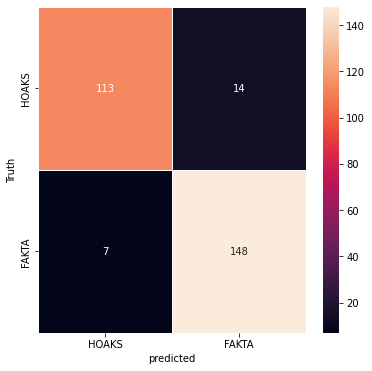

In [62]:
# cm = confusion_matrix(y_test, y_result)
# plt = figure(figsize=(6,6))
# sns.heatmap(cm, annot=True, fmt='d', xticklabels=['HOAKS', 'FAKTA'], yticklabels=['HOAKS', 'FAKTA'], cmap=plt.cm.Blue, cbar=False)
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()

cm = confusion_matrix(y_test, y_result)

plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,linewidths=1, xticklabels=['HOAKS', 'FAKTA'], yticklabels=['HOAKS', 'FAKTA'], fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
import pickle
pickle.dump(model, open('fakenews_model.pkl', 'wb'))

In [ ]:
pickle.dump(vec, open('vec.pkl', 'wb'))

In [ ]:
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))